In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('MNIST_train.csv')
test = pd.read_csv('MNIST_test.csv')

In [4]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


### a) From the training and test datasets, select images belonging to class 6 and 4

In [8]:
train_data = train.loc[(train['label'] == 6) | (train['label'] == 4)]
test_data = test.loc[(test['label'] == 6) | (test['label'] == 4)]

#### b) Use the principal component analysis PCA() with the parameter svd_solver='full' to reduce the dimensionality of the resulting datasets. Determine the minimum number of principal components  to use so that the explained variance ratio exceeds 0.85 (is strictly greater than the specified value) on the training dataset.

In [9]:
from sklearn.decomposition import PCA
import numpy as np

X_train = train_data.drop(columns='label')
X_test = test_data.drop(columns='label')
y_train = train_data['label']
y_test = test_data['label']

pca = PCA(svd_solver='full')

pca.fit(X_train)

PCA(svd_solver='full')

In [12]:
M = np.argmax(pca.explained_variance_ratio_.cumsum() > 0.85) + 1
M

52

### c) Find the scores that meet the found M principal components for the training and test datasets.

### Enter the coordinate relative to 5 principal component for 7 image in the training dataset:
#### The decimal separator is a period. Round your answer to three decimal places.

In [13]:
pca = PCA(svd_solver='full', n_components=M)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [14]:
X_train_pca.shape

(11760, 52)

In [48]:
round(X_train_pca[6, 4], 3)

-175.246

### 2. Model training

#### Use the data (two classes and reduced dimensionality) to train the models below.

#### a) Train sklearn.ensemble.GradientBoostingClassifier model on the training dataset with the following parameters: n_estimators=500, learning_rate=0.8, random_state=17, max_depth=2.

#### Build classification_report and the confusion matrix for the resulting model on test dataset.

#### Enter the model accuracy value:
##### The decimal separator is a period. Round your answer to four decimal places.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.8, random_state=17, max_depth=2)
gbc.fit(X_train_pca, y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=17)

In [20]:
print(classification_report(y_test, gbc.predict(X_test_pca), digits=4))

              precision    recall  f1-score   support

           4     0.9919    0.9929    0.9924       982
           6     0.9927    0.9916    0.9922       958

    accuracy                         0.9923      1940
   macro avg     0.9923    0.9923    0.9923      1940
weighted avg     0.9923    0.9923    0.9923      1940



In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, gbc.predict(X_test_pca))
# Determine fp: 7
# Determine tp: 950

array([[975,   7],
       [  8, 950]])

### b) Based on sklearn.ensemble.BaggingClassifier using DecisionTreeClassifier train a model with the following parameters on the training dataset:

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_class = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5,
    max_features=0.5,
    bootstrap=False,
    random_state=17)

bag_class.fit(X_train_pca, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.5, max_samples=0.5, random_state=17)

In [27]:
print(classification_report(y_test, bag_class.predict(X_test_pca), digits=4))

              precision    recall  f1-score   support

           4     0.9760    0.9929    0.9844       982
           6     0.9926    0.9749    0.9837       958

    accuracy                         0.9840      1940
   macro avg     0.9843    0.9839    0.9840      1940
weighted avg     0.9842    0.9840    0.9840      1940



In [28]:
confusion_matrix(y_test, bag_class.predict(X_test_pca))
# Determine fn: 24
# Determine tn: 975

array([[975,   7],
       [ 24, 934]])

### While making the task work with images as cv2 objects, do not save them as files!

### 1. Read the image using OpenCV library:

In [1]:
import cv2
import matplotlib.pyplot as plt

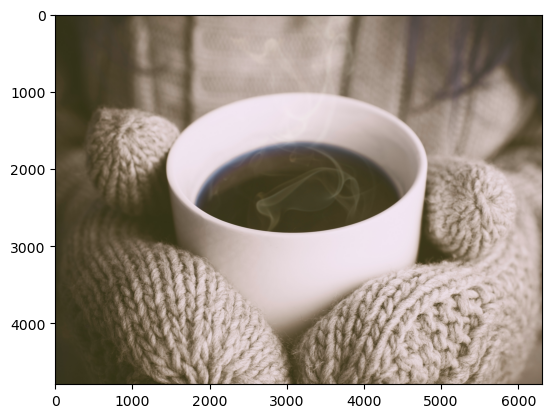

In [2]:
img = cv2.imread('alex-padurariu-k0SwnevO_wk-unsplash.jpg')
plt.imshow(img)

### 2. Convert it to RGB colors.

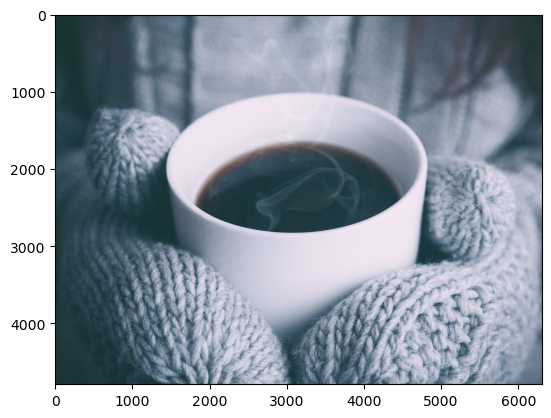

In [3]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

### 3. Compress the image (hereinafter the compressed image) to the width of 3151 pixels, observing the ratio of the original image. Please note: do not round the sides ratio while calculating. If the height turns out to be a non integer value, then round the heigt value down to an integer. Use cv2.resize() with parameter interpolation = cv2.INTER_AREA.

In [4]:
h, w, c = rgb_img.shape
new_w = 3151
k = float(w) / h
dim = (new_w, int(new_w / k))

In [5]:
compressed_img = cv2.resize(rgb_img, dim, interpolation=cv2.INTER_AREA)

### Enter the ratio of the original image width to its height:
#### Round the answer to the nearest thousandths, but use the exact width value to calculate the height.

In [40]:
round(k, 3)

1.316

### Enter the height of the resulting compressed image:

In [41]:
compressed_img.shape

(2394, 3151, 3)

### 4. Plot a histogram of the compressed image in the RGB palette. Compare the intensity density estimation across the channels R, G and B.

### Enter the highest density value among three channels:
#### Enter the result with an accuracy of 4 decimal places.

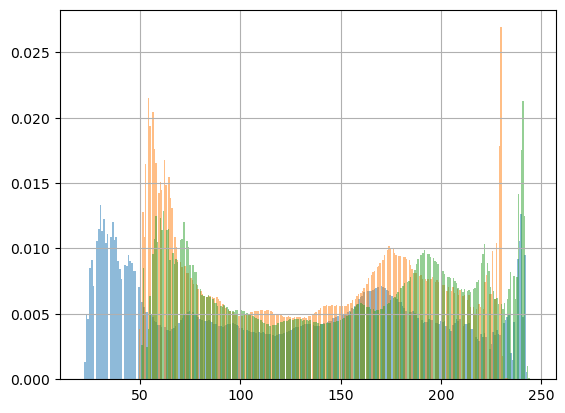

In [6]:
red = plt.hist(compressed_img[:,:,0].ravel(), bins=256, label='red', alpha = 0.5, density=True)
green = plt.hist(compressed_img[:,:,1].ravel(), bins=256, label='green', alpha = 0.5, density=True)
blue = plt.hist(compressed_img[:,:,2].ravel(), bins=256, label='blue', alpha = 0.5, density=True)
plt.grid()

In [47]:
round(max(max(red[0]), max(green[0]), max(blue[0])), 4)

0.0269